In [2]:
# Script for reaction time models with within-trial baseline dynamics. Simulations, analytical solutions, parameter recovery, fitting methods
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from Scripts import behaviour, BDI
from scipy.optimize import differential_evolution
from skopt import dump
np.random.seed(0)
    

In [3]:
path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'
subj_path = r'E:\Free Choice\Data\tDCS\tDCS\Final Data'
subj_keys = behaviour.get_immediate_subdirectories(subj_path)
polarity_keys = ['AN', 'CA'] 
exp_keys = ['PR','ST', 'PO']
delayBins = 5



In [5]:
## Fit Model to all Data
for subj in subj_keys:
    for polarity in polarity_keys:
        for exp in exp_keys:
            data = behaviour.combineBehaviour(path = path, all_key = False, subj_key= subj,
                                              polarity_key = polarity, exp_key = exp)
            bnds = ((1e-8, 1), (1e-5, 2), (1e-6, 1e-1), (0.0001, 1))
            modelFit = differential_evolution(BDI.fiteLATERModel, bounds = bnds, args=([data, delayBins]))
            dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Gated Accumulation\Model Fits\eLATERfit_{subj}_{polarity}_{exp}')


c:\Users\Brandon\Desktop\PhD\Gated Accumulation\Notebooks\Scripts\BDI.py:186: RuntimeWarning: invalid value encountered in divide
  pT = pT / np.sum(pT)
c:\Users\Brandon\Desktop\PhD\Gated Accumulation\.venv\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan


c:\Users\Brandon\Desktop\PhD\Gated Accumulation\Notebooks\Scripts\BDI.py:186: RuntimeWarning: invalid value encountered in divide
  pT = pT / np.sum(pT)


probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan


c:\Users\Brandon\Desktop\PhD\Gated Accumulation\.venv\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
c:\Users\Brandon\Desktop\PhD\Gated Accumulation\Notebooks\Scripts\BDI.py:186: RuntimeWarning: invalid value encountered in divide
  pT = pT / np.sum(pT)
c:\Users\Brandon\Desktop\PhD\Gated Accumulation\.venv\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan


c:\Users\Brandon\Desktop\PhD\Gated Accumulation\Notebooks\Scripts\BDI.py:186: RuntimeWarning: invalid value encountered in divide
  pT = pT / np.sum(pT)
c:\Users\Brandon\Desktop\PhD\Gated Accumulation\.venv\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan


c:\Users\Brandon\Desktop\PhD\Gated Accumulation\Notebooks\Scripts\BDI.py:186: RuntimeWarning: invalid value encountered in divide
  pT = pT / np.sum(pT)
c:\Users\Brandon\Desktop\PhD\Gated Accumulation\.venv\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan


c:\Users\Brandon\Desktop\PhD\Gated Accumulation\Notebooks\Scripts\BDI.py:186: RuntimeWarning: invalid value encountered in divide
  pT = pT / np.sum(pT)
c:\Users\Brandon\Desktop\PhD\Gated Accumulation\.venv\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan


c:\Users\Brandon\Desktop\PhD\Gated Accumulation\Notebooks\Scripts\BDI.py:186: RuntimeWarning: invalid value encountered in divide
  pT = pT / np.sum(pT)


probabilities contain nan


c:\Users\Brandon\Desktop\PhD\Gated Accumulation\Notebooks\Scripts\BDI.py:186: RuntimeWarning: invalid value encountered in divide
  pT = pT / np.sum(pT)
c:\Users\Brandon\Desktop\PhD\Gated Accumulation\.venv\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan


c:\Users\Brandon\Desktop\PhD\Gated Accumulation\Notebooks\Scripts\BDI.py:186: RuntimeWarning: invalid value encountered in divide
  pT = pT / np.sum(pT)
c:\Users\Brandon\Desktop\PhD\Gated Accumulation\.venv\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan


In [5]:
## Fit Gated Model to Individuals
bnds = ((1, 1), (.4,.6), (1, 2), 
        (.05, .1), (2/1000, 6/1000), 
        (.8/1000, 2/1000), (0.01,1), (1,1)) 

for subj in subj_keys:
    for polarity in polarity_keys:
        for exp in exp_keys:
            data = behaviour.combineBehaviour(path = path, all_key = False, subj_key= subj,
                                              polarity_key = polarity, exp_key = exp)
            modelFit = differential_evolution(BDI.fitBaselineModel, bounds = bnds, args=([data, delayBins]))
            dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Gated Accumulation\Model Fits\modelfit_{subj}_{polarity}_{exp}')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Brandon\\Desktop\\PhD\\Baseline Dynamics\\Baseline-Dynamics\\Model_Fits\\modelfit_OM_AN_PR'

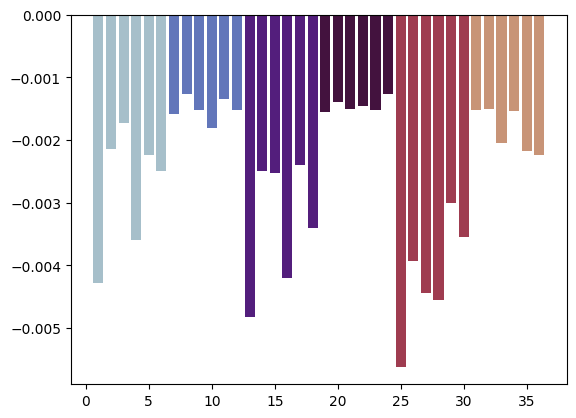

In [4]:
from skopt import load
import matplotlib.pyplot as plt
counter = 1
color = iter(cm.twilight(np.linspace(0.1, 1, 7)))
for subj in subj_keys:
    c = next(color)
    for polarity in polarity_keys:
        for exp in exp_keys:
            eLATER_Model = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\eLATERfit_{subj}_{polarity}_{exp}')
            baseline_Model = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_{subj}_{polarity}_{exp}')
            plt.bar(counter, eLATER_Model.fun - baseline_Model.fun, color = c)
            counter = counter + 1


#plt.savefig(rf"C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Figures\eLATER vs Baseline Model", format='svg')
